<span style="font-size:24px; font-weight:bold;">**Algorithmic Implementation**</span>

In [80]:
import pandas as pd

money = pd.read_csv('/Users/capi/Downloads/mobile_money.csv')
money.head()

,hhid,cellphone,wealth,size,education_years,education_other,bank_acct,mattress,sacco,merry,...,d1,d2,d3,d4,d5,false,lmean_recddist,ldistance,urban,mweight
0,1649034,1.0,202600.0,1.0,3.0,0.0,no,no,no,no,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,1,4.305487
1,1649056,0.0,13300.0,5.0,8.0,0.0,no,yes,no,yes,...,0.4,0.2,0.2,0.2,0.0,NaN,NaN,NaN,1,4.006307
2,1649063,1.0,149700.0,5.0,0.0,1.0,no,no,yes,yes,...,0.6,0.0,0.2,0.2,0.0,NaN,NaN,NaN,1,3.904419
3,1649041,1.0,20000.0,5.0,12.0,0.0,no,yes,no,no,...,0.4,0.2,0.2,0.2,0.0,NaN,5.913503,5.372935,1,4.054456
4,1649012,1.0,31000.0,5.0,0.0,0.0,yes,yes,no,no,...,0.0,0.0,0.2,0.4,0.2,1.0,NaN,NaN,1,3.706399


In [81]:
mpesa_summary = money['mpesa_user'].describe()
mpesa_summary

count     2282
unique       2
top        yes
freq      1676
Name: mpesa_user, dtype: object

In [82]:
variables_to_analyze = [
    'cellphone', 'totexppc', 'wkexppc', 'wealth', 'size', 'education_years', 'pos', 'neg', 'ag', 'sick', 
    'sendd', 'recdd', 'bank_acct', 'mattress', 'sacco', 'merry', 'occ_farmer', 'occ_public', 'occ_prof', 
    'occ_help', 'occ_bus', 'occ_sales', 'occ_ind', 'occ_other', 'occ_ue'
]

grouped_summary = money[variables_to_analyze + ['mpesa_user']].groupby('mpesa_user').describe()

grouped_summary

cellphone                                              totexppc  \
               count      mean       std  min  25%  50%  75%  max    count   
mpesa_user                                                                   
no             598.0  0.424749  0.494719  0.0  0.0  0.0  1.0  1.0    605.0   
yes           1675.0  0.921791  0.268580  0.0  1.0  1.0  1.0  1.0   1675.0   

                          ... occ_other       occ_ue                           \
                    mean  ...       75%  max   count      mean       std  min   
mpesa_user                ...                                                   
no          53913.083213  ...       0.0  1.0   606.0  0.092409  0.289842  0.0   
yes         84470.777873  ...       0.0  1.0  1676.0  0.078759  0.269443  0.0   

                                
            25%  50%  75%  max  
mpesa_user                      
no          0.0  0.0  0.0  1.0  
yes         0.0  0.0  0.0  1.0  

[2 rows x 168 columns]

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score

# Convert categorical variables to numeric (e.g. 'yes' with 1, 'no' with 0)
categorical_columns = ['bank_acct', 'mattress', 'sacco', 'merry', 'occ_farmer', 'occ_public', 'occ_prof', 'occ_help', 'occ_ue', 
                       'occ_bus', 'occ_sales', 'occ_ind', 'occ_other']

# Replace 'yes' with 1 and 'no' with 0 in categorical columns
money[categorical_columns] = money[categorical_columns].replace({'yes': 1, 'no': 0})

# Prepare data (predictors and predictor)
X = money[variables_to_analyze] # Features (preidctors)
Y = money['mpesa_user'] # Outcome Variable (predicted)

# Clean data by filling NaNs with median of data for a given variable X
X = X.fillna(X.median())

# Train-test split 80-20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Standardize data (predictors)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression classifier model
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train_scaled, Y_train)
Y_pred_log_reg = log_reg.predict(X_test_scaled)

# Random forest classifier model
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train_scaled, Y_train)
Y_pred_rf = rf.predict(X_test_scaled)

# Linear discriminant analysis classifier model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, Y_train)
Y_pred_lda = lda.predict(X_test_scaled)

# Evaluate accuracy of the models
log_reg_accuracy = accuracy_score(Y_test, Y_pred_log_reg)
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
lda_accuracy = accuracy_score(Y_test, Y_pred_lda)

# Evalutate area under the curve (AUC) criteria of the models
log_reg_auc = roc_auc_score(Y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
rf_auc = roc_auc_score(Y_test, rf.predict_proba(X_test_scaled)[:, 1])
lda_auc = roc_auc_score(Y_test, lda.predict_proba(X_test_scaled)[:, 1])

# Display results
(log_reg_accuracy, rf_accuracy, lda_accuracy), (log_reg_auc, rf_auc, lda_auc)

((0.8315098468271335, 0.8402625820568927, 0.8271334792122538),
 (0.8860657294832828, 0.8744063449848025, 0.8833824088145896))

Logistic regression, random forest, and linear discriminant analysis (LDA) classifier models have accuracy of approximately 83.15%, 84.03%, and 82.71% respectively.

Therefore, LDA has the least accurate measure, followed by logistic regression, indicating that a more flexible model is needed. The random forest model had the highest accuracy indicating potential non-linearity in the data.

Logistic regression, random forest, and linear discriminant analysis classifier models have area under the curve (AUC) criteria estimates of approximately 88.61%, 87.44%, and 88.34% respectively.

Therefore, the logistic regression and LDA have similar AUC critera however for the logistic regression it is slightly higher by about 0.27% making it the slightly better classifier in terms of AUC criteria. The random forest AUC is lower than both by about 1%.

As a result, based on accuracy the random forest classifier is the best but based on AUC criteria the logistic regression is preferred, in terms of accurately distinguishing classes.

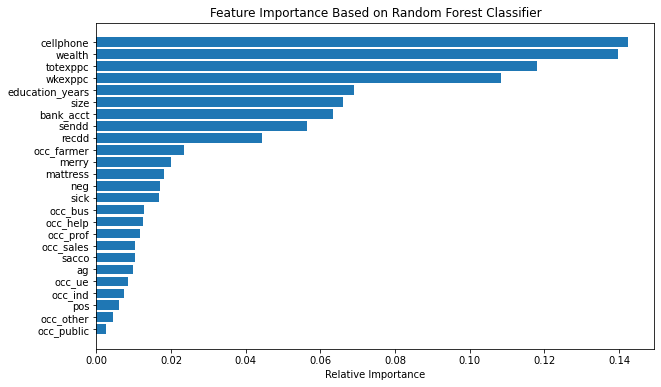

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from trained random forest model
feature_importances = rf.feature_importances_

# Get feature names corresponding to columns used
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize = (10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], align = 'center')
plt.xlabel('Relative Importance')
plt.title('Feature Importance Based on Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

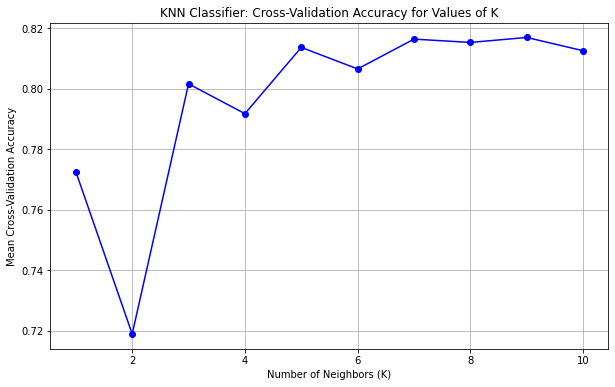

(9, 0.8169863013698629)

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Generate list to store cross-validation results for each value of K
k_values = range(1, 11) # K from 1 to 10
cv_results = []

# Perform cross-validation for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    cv_scores = cross_val_score(knn, X_train_scaled, Y_train, cv = 5, scoring = 'accuracy') # 5-fold cross-validation
    cv_results.append(np.mean(cv_scores)) # Store the mean accuracy for each K

# Find the best K
best_k = k_values[np.argmax(cv_results)]
best_cv_score = np.max(cv_results)

# Plot the cross-validation scores for each K
plt.figure(figsize = (10, 6))
plt.plot(k_values, cv_results, marker = 'o', linestyle = '-', color = 'b')
plt.title('KNN Classifier: Cross-Validation Accuracy for Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Best K and its cross-validation accuracy score 
best_k, best_cv_score 

Best performing K occurs at K = 9 with a mean cross-validation accuracy of approximately 81.7%.

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid for logistic regression
param_grid = {
    'penalty': ['l1', 'l2'], # l1 is Lasso and l2 is Ridge regularization
    'C': [0.1, 1, 10, 100]   # Regularization strength
}

# Generate logistic regression model
log_reg_model = LogisticRegression(max_iter = 1000, solver = 'liblinear')

# Grid search with cross-validation
grid_search = GridSearchCV(log_reg_model, param_grid, cv = 5, scoring = 'accuracy', verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train_scaled, Y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 8 candidates, totalling 40 fits


({'C': 0.1, 'penalty': 'l2'}, 0.838904109589041)

Therefore, the best combination of hyperparameters to achieve the best cross-validation accuracy for the logistic regression is C = 0.1 using Ridge regularization as the penalty method.

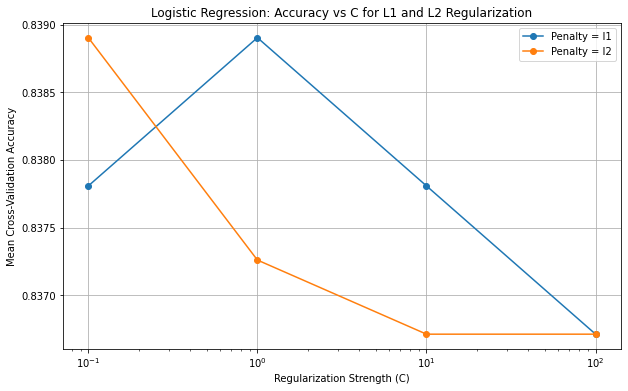

In [87]:
# Get results from grid search
results = grid_search.cv_results_

# Create a DataFrame
cv_results_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(10, 6))
for penalty in ['l1', 'l2']:
    # Filter the rows for each penalty and plot accuracy vs C
    mask = cv_results_df['param_penalty'] == penalty
    plt.plot(cv_results_df.loc[mask, 'param_C'], cv_results_df.loc[mask, 'mean_test_score'], marker='o', label=f'Penalty = {penalty}')

plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Logistic Regression: Accuracy vs C for L1 and L2 Regularization')
plt.legend()
plt.xscale('log')  
plt.grid(True)
plt.show()

As C increases regularization weakens, and the accuracy for the Lasso regularization method initally increases from C = 0.1 to C = 1 but then decreases after C = 1. As for the Ridge regularization method the accuracy decreases throughout and remains the same at C = 10 and C = 100. At C = 0.1 the Ridge method is more accurate but for C = 1, 10, 100 the Lasso method provides a more accurate model.

The random forest classifier is the best due to it being the most accurate of the three classifiers, almost 1% more accurate than logistic regression and 1.32% more accurate than LDA. Therefore, it is slightly more accurate in distinguishing classes especially those who have a cell phone from those who don't which is the most important feature in the model when predicting who adopts mobile money.

Those who have a phone is the most relevant feature in determining if an indivdual adopts mobile money, followed by wealth, consumption per capita, and food consumption per capita in descending order of importance. Therefore, the Kenyan government should target the population with low levels of these measures by enacting policies such as subsidizing sales of cell phones to increase cell phone purchases resulting in increased mobile money adoption.